In [1]:
!pip install tensorflow
!pip install pillow
!pip install scipy
!pip install matplotlib
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext

from pathlib import Path




def opF(path):
    p = Path(path)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install --upgrade moviepy
!pip install torch torchvision torchaudio
import json
import os
from moviepy.editor import *
from moviepy import *
import numpy as np
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
%cd video-classification-3d-cnn-pytorch/

C:\Users\SherryAi\Desktop\video classification\video-classification-3d-cnn-pytorch


In [3]:
from moviepy.editor import VideoFileClip
import os
import numpy as np
import tensorflow as tf


def load_image(img_file, target_size=(224, 224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file,
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

model = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    pooling='avg'
)


In [4]:
XVideo = VideoFileClip(r"../ScrapedVideos/Abramovic-Marina_Balkan-Erotic-Epic_2006.mp4")
frames_directory = "../frames"
for i in range(int(XVideo.duration)):
    frameX = XVideo.get_frame(i)
    filename = f"{i}.jpg"
    
    try:
        img = Image.fromarray(frameX)
        img.save(os.path.join(frames_directory, filename), "JPEG")
    except Exception as e:
        print(f"Error: {str(e)}")

In [5]:
inputX_Path = "../sketch.jpg"
opF(inputX_Path)

inputX_image = load_image(inputX_Path)
featureinputX = model.predict(inputX_image)[0]

1/1 [==============================] - 0s 358ms/step


In [7]:
featureFrames = []
for i in range(int(XVideo.duration)):
    Frames_images_Path = f"../frames/{str(i)}.jpg"
    opF(Frames_images_Path)
    Frames_images = load_image(Frames_images_Path)
    featureFrames_images = model.predict(Frames_images)[0]
    featureFrames.append(featureFrames_images)

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


In [8]:
distances = []
for i, s in enumerate(featureFrames):
    distanceX = np.linalg.norm(s - featureinputX)
    distances.append((i, distanceX))

distances.sort(key=lambda x: x[1])
print(distances[0])


(440, 23.29433)


In [9]:
print(distances[:20])

[(440, 23.29433), (444, 23.372015), (441, 23.51885), (439, 23.83357), (433, 23.957651), (442, 24.11819), (443, 24.223019), (432, 24.754099), (438, 24.796051), (437, 25.039219), (146, 25.266956), (0, 25.267412), (169, 25.267412), (325, 25.267412), (396, 25.267412), (412, 25.27256), (738, 25.29866), (435, 25.341883), (436, 25.67478), (394, 25.971983)]


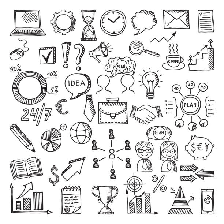

In [10]:
tf.keras.preprocessing.image.load_img(inputX_Path, target_size=(224,224))

In [11]:
from moviepy.editor import VideoFileClip

videoX = VideoFileClip(r"../ScrapedVideos/Abramovic-Marina_Balkan-Erotic-Epic_2006.mp4")
subVideo = videoX.subclip(432, 444)
subVideo.write_videofile("../output_films/Abramovic-Marina_Balkan-Erotic-Epic_2006_360_379.mp4", audio_codec='aac')


Moviepy - Building video ../output_films/Abramovic-Marina_Balkan-Erotic-Epic_2006_360_379.mp4.
MoviePy - Writing audio in Abramovic-Marina_Balkan-Erotic-Epic_2006_360_379TEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../output_films/Abramovic-Marina_Balkan-Erotic-Epic_2006_360_379.mp4



Moviepy - Done !
Moviepy - video ready ../output_films/Abramovic-Marina_Balkan-Erotic-Epic_2006_360_379.mp4


In [12]:
subVideo.ipython_display()

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
